# <center> Accelerated Deep Learning with PyTorch





<center> **[Wafa Louhichi]()**, [Michael Isaev](), [Tom Kurfess](http://www.me.gatech.edu/faculty/kurfess) and [Rich Vuduc](https://vuduc.org)

<center> [Jupyter Day Atlanta (2018)](https://atl-jugheads.github.io/jupyter-day-atlanta-ii/).

This tutorial shows you how to train a deep neural network using [PyTorch](http://pytorch.org/). PyTorch is a Python package aimed at accelerating deep learning applications, building on the [Torch](http://torch.ch/) library. PyTorch provides a [Numpy](http://www.numpy.org/)-like abstraction for representing _tensors_, or multiway arrays, and it can take advantage of [GPUs](http://www.nvidia.com/object/what-is-gpu-computing.html) for performance. The tutorial ends with a short case study, which is how one of us [Wafa]() applied PyTorch to automate the inspection of surface finish quality in manufacturing.

> Besides PyTorch, there are numerous proposed tools and extensions to get GPU acceleration for multiway arrays. See **Suggested Next Steps** at the end of this tutorial for pointers.

**Knowledge prerequisites.** This tutorial assumes familiarity with Python and Numpy, for starters.

In [1]:
import numpy as np

From there, PyTorch makes it easy to get started with deep learning even if your background in the topic is modest. At a minimum, it's helpful to know that a multilayer neural network model may be viewed as a graph of nodes (values and functions on values) connected by weights (the unknown parameters of the model), where one wishes to estimate the weights from data using an optimization procedure (think: gradient computations!) based on forward and backward propagation.

**Software prerequisites.** You'll need to install PyTorch before running this notebook. Here's a code cell to verify that you are ready to go.

In [2]:
import torch

**Hardware niceties.** Lastly, to exploit GPUs, you'll need an NVIDIA GPU with the CUDA SDK installed. It is reported that 10-100$\times$ speedups are possible by doing so. Of course, if you don't have such a setup, PyTorch still can run using the CPU only. But remember, when it comes to training neural network models, life is short---so you should use GPUs if you can!

## **Presentation Outline.**

### 1. Essential PyTorch Background
### 2. PyTorch for Data Analytics
### 3. LeNet Convolutional Neural Network (CNN) in PyTorch 
### 4. Application to a Manufacturing Problem

## 1. Essential PyTorch background

* PyTorch is a Python package aimed at accelerating deep learning applications, building on the [Torch](http://torch.ch/) library. 
* PyTorch provides a [Numpy](http://www.numpy.org/)-like abstraction for representing _tensors_, or multiway arrays, and it can take advantage of [GPUs](http://www.nvidia.com/object/what-is-gpu-computing.html) for performance.

<img src="images/tensor.png" style="max-width:100%; width: 75%; max-width: none"/>

## 1.1 PyTorch Tensors

The key data abstraction of PyTorch is a tensor, which is a multidimensional array. It is similar in functionality to Numpy's `ndarray` object. Use [torch.Tensor()](http://pytorch.org/docs/master/tensors.html) to create one.

In [3]:
# Generate a 2-D pytorch tensor (i.e., a matrix)
pytorch_tensor = torch.Tensor(10, 20)
print("type: ", type(pytorch_tensor), " and size: ", pytorch_tensor.shape )

type:  <class 'torch.FloatTensor'>  and size:  torch.Size([10, 20])


If you need a Numpy-compatible representation, or if you want to create a PyTorch tensor from an existing Numpy object, it's easy to do.

In [4]:
# Convert the pytorch tensor to a numpy array:
numpy_tensor = pytorch_tensor.numpy()
print("type: ", type(numpy_tensor), " and size: ", numpy_tensor.shape)

# Convert the numpy array to Pytorch Tensor:
print("type: ", type(torch.Tensor(numpy_tensor)), " and size: ", torch.Tensor(numpy_tensor).shape)

type:  <class 'numpy.ndarray'>  and size:  (10, 20)
type:  <class 'torch.FloatTensor'>  and size:  torch.Size([10, 20])


## 1.2 PyTorch vs. NumPy

PyTorch is not a drop in replacement for NumPy, but it implements a lot of Numpy functionality. One inconvenience is it's naming scheme that sometimes is rather different from Numpy. Let's go over several examples to see the difference. Let's look at PyTorch and NumPy differences on various examples:

#### 1. Tensor creation

In [5]:
t = torch.rand(2, 4, 3, 5)
a = np.random.rand(2, 4, 3, 5)

In [6]:
print('Random Tensor with size (3, 4):\n', torch.rand(3, 4))
print("Random NdArray with size (3, 4):\n", np.random.rand(3, 4))
print('-------------------------------------------------------------------------')

Random Tensor with size (3, 4):
 
 0.2687  0.4535  0.1562  0.1470
 0.6824  0.5180  0.2928  0.4175
 0.2522  0.0826  0.7987  0.1032
[torch.FloatTensor of size 3x4]

Random NdArray with size (3, 4):
 [[ 0.9221226   0.54427845  0.39084139  0.11807335]
 [ 0.58825753  0.06241606  0.89243157  0.33282672]
 [ 0.16356127  0.74073636  0.8937606   0.25118884]]
-------------------------------------------------------------------------


You can see other initializations schemes like zeros, ones, and identity matrices below.

In [7]:
print('Tensor of zeros with size (3, 4):\n', torch.zeros(3, 4))
print('NdArray of zeros with size (3, 4):\n', np.zeros((3, 4)))
print('-------------------------------------------------------------------------')

print('Tensor of ones with size (3, 4):\n', torch.ones(3, 4))
print('NdArray of ones with size (3, 4):\n', np.ones((3, 4)))
print('-------------------------------------------------------------------------')

print('Identity Tensor with size (3, 4):\n', torch.eye(3, 4))
print("Identity NdArray with size (3, 3) (can't create non-squared identity matrix):\n", np.eye(3))
print('-------------------------------------------------------------------------')

Tensor of zeros with size (3, 4):
 
 0  0  0  0
 0  0  0  0
 0  0  0  0
[torch.FloatTensor of size 3x4]

NdArray of zeros with size (3, 4):
 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
-------------------------------------------------------------------------
Tensor of ones with size (3, 4):
 
 1  1  1  1
 1  1  1  1
 1  1  1  1
[torch.FloatTensor of size 3x4]

NdArray of ones with size (3, 4):
 [[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
-------------------------------------------------------------------------
Identity Tensor with size (3, 4):
 
 1  0  0  0
 0  1  0  0
 0  0  1  0
[torch.FloatTensor of size 3x4]

Identity NdArray with size (3, 3) (can't create non-squared identity matrix):
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
-------------------------------------------------------------------------


#### 2. Tensor slicing

In [8]:
t = torch.rand(2, 4, 3, 5)
a = t.numpy()

print ('Tensor:\n', t)
print ('NdArray:\n', a)
print ('-------------------------------------------------------------------------')

Tensor:
 
(0 ,0 ,.,.) = 
  0.2353  0.3940  0.5236  0.0965  0.7462
  0.8047  0.7706  0.7035  0.8961  0.6226
  0.0524  0.2388  0.6801  0.2517  0.7626

(0 ,1 ,.,.) = 
  0.7094  0.3178  0.9071  0.5035  0.2032
  0.9533  0.7225  0.3106  0.6425  0.1594
  0.6849  0.3640  0.7304  0.8298  0.3114

(0 ,2 ,.,.) = 
  0.5726  0.1185  0.8974  0.1053  0.9073
  0.5831  0.8008  0.8334  0.8271  0.6497
  0.3021  0.4453  0.0228  0.4584  0.2826

(0 ,3 ,.,.) = 
  0.5222  0.3387  0.6303  0.9214  0.4238
  0.0181  0.5255  0.1014  0.9714  0.8173
  0.2635  0.7258  0.1076  0.1959  0.0803

(1 ,0 ,.,.) = 
  0.3146  0.8596  0.5384  0.5301  0.2259
  0.5644  0.4054  0.6867  0.3449  0.1055
  0.3096  0.9881  0.0009  0.7668  0.1698

(1 ,1 ,.,.) = 
  0.5302  0.7687  0.4239  0.1969  0.9981
  0.4789  0.1910  0.4797  0.1617  0.1610
  0.6330  0.6916  0.9095  0.5786  0.4924

(1 ,2 ,.,.) = 
  0.1892  0.6991  0.3013  0.7681  0.7045
  0.2920  0.5094  0.4631  0.6119  0.3043
  0.4938  0.5368  0.3839  0.8246  0.4544

(1 ,3 ,.,.) = 
  

In [9]:
pytorch_slice = t[0, 1:3, :, 4]
numpy_slice =  a[0, 1:3, :, 4]

In [10]:
print ('Tensor[0, 1:3, :, 4]:\n', pytorch_slice)
print ('NdArray[0, 1:3, :, 4]:\n', numpy_slice)
print ('-------------------------------------------------------------------------')

Tensor[0, 1:3, :, 4]:
 
 0.2032  0.1594  0.3114
 0.9073  0.6497  0.2826
[torch.FloatTensor of size 2x3]

NdArray[0, 1:3, :, 4]:
 [[ 0.20322084  0.15935552  0.31143939]
 [ 0.90726137  0.64966112  0.28259504]]
-------------------------------------------------------------------------


Below you can find more slicing examples.

In [11]:
print ('Tensor size:\n', t.size())
print ('NdArray size:\n', a.shape)
print ('-------------------------------------------------------------------------')

print ('Tensor[0][1][2][3]:\n', t[0][1][2][3])
print ('NdArray[0][1][2][3]:\n', a[0][1][2][3])
print ('-------------------------------------------------------------------------')

print ('Tensor[0, 1, 2, 3]:\n', t[0, 1, 2, 3])
print ('NdArray[0, 1, 2, 3]:\n', a[0, 1, 2, 3])
print ('-------------------------------------------------------------------------')

print ('Tensor[0][1]:\n', t[0][1])
print ('NdArray[0][1]:\n', a[0][1])
print ('-------------------------------------------------------------------------')

print ('Tensor[0, 1:3]:\n', t[0, 1:3])
print ('NdArray[0, 1:3]:\n', a[0, 1:3])
print ('-------------------------------------------------------------------------')

Tensor size:
 torch.Size([2, 4, 3, 5])
NdArray size:
 (2, 4, 3, 5)
-------------------------------------------------------------------------
Tensor[0][1][2][3]:
 0.8298084139823914
NdArray[0][1][2][3]:
 0.829808
-------------------------------------------------------------------------
Tensor[0, 1, 2, 3]:
 0.8298084139823914
NdArray[0, 1, 2, 3]:
 0.829808
-------------------------------------------------------------------------
Tensor[0][1]:
 
 0.7094  0.3178  0.9071  0.5035  0.2032
 0.9533  0.7225  0.3106  0.6425  0.1594
 0.6849  0.3640  0.7304  0.8298  0.3114
[torch.FloatTensor of size 3x5]

NdArray[0][1]:
 [[ 0.70938146  0.31781477  0.907121    0.50354886  0.20322084]
 [ 0.95334393  0.72249353  0.31060135  0.64249557  0.15935552]
 [ 0.68485779  0.36396331  0.73043436  0.82980841  0.31143939]]
-------------------------------------------------------------------------
Tensor[0, 1:3]:
 
(0 ,.,.) = 
  0.7094  0.3178  0.9071  0.5035  0.2032
  0.9533  0.7225  0.3106  0.6425  0.1594
  0.6849

#### 3. Tensor masking

In [12]:
t = t - 0.5
a = t.numpy()

print ('Tensor:\n', t)
print ('NdArray:\n', a)
print ('-------------------------------------------------------------------------')

Tensor:
 
(0 ,0 ,.,.) = 
 -0.2647 -0.1060  0.0236 -0.4035  0.2462
  0.3047  0.2706  0.2035  0.3961  0.1226
 -0.4476 -0.2612  0.1801 -0.2483  0.2626

(0 ,1 ,.,.) = 
  0.2094 -0.1822  0.4071  0.0035 -0.2968
  0.4533  0.2225 -0.1894  0.1425 -0.3406
  0.1849 -0.1360  0.2304  0.3298 -0.1886

(0 ,2 ,.,.) = 
  0.0726 -0.3815  0.3974 -0.3947  0.4073
  0.0831  0.3008  0.3334  0.3271  0.1497
 -0.1979 -0.0547 -0.4772 -0.0416 -0.2174

(0 ,3 ,.,.) = 
  0.0222 -0.1613  0.1303  0.4214 -0.0762
 -0.4819  0.0255 -0.3986  0.4714  0.3173
 -0.2365  0.2258 -0.3924 -0.3041 -0.4197

(1 ,0 ,.,.) = 
 -0.1854  0.3596  0.0384  0.0301 -0.2741
  0.0644 -0.0946  0.1867 -0.1551 -0.3945
 -0.1904  0.4881 -0.4991  0.2668 -0.3302

(1 ,1 ,.,.) = 
  0.0302  0.2687 -0.0761 -0.3031  0.4981
 -0.0211 -0.3090 -0.0203 -0.3383 -0.3390
  0.1330  0.1916  0.4095  0.0786 -0.0076

(1 ,2 ,.,.) = 
 -0.3108  0.1991 -0.1987  0.2681  0.2045
 -0.2080  0.0094 -0.0369  0.1119 -0.1957
 -0.0062  0.0368 -0.1161  0.3246 -0.0456

(1 ,3 ,.,.) = 
  

In [13]:
pytorch_masked = t[t > 0]
numpy_masked = a[a > 0]

In [14]:
print ('Tensor[Tensor > 0]:\n', pytorch_masked)
print ('NdArray[NdArray > 0]:\n', numpy_masked)
print ('-------------------------------------------------------------------------')

Tensor[Tensor > 0]:
 
 0.0236
 0.2462
 0.3047
 0.2706
 0.2035
 0.3961
 0.1226
 0.1801
 0.2626
 0.2094
 0.4071
 0.0035
 0.4533
 0.2225
 0.1425
 0.1849
 0.2304
 0.3298
 0.0726
 0.3974
 0.4073
 0.0831
 0.3008
 0.3334
 0.3271
 0.1497
 0.0222
 0.1303
 0.4214
 0.0255
 0.4714
 0.3173
 0.2258
 0.3596
 0.0384
 0.0301
 0.0644
 0.1867
 0.4881
 0.2668
 0.0302
 0.2687
 0.4981
 0.1330
 0.1916
 0.4095
 0.0786
 0.1991
 0.2681
 0.2045
 0.0094
 0.1119
 0.0368
 0.3246
 0.2249
 0.0392
 0.1014
 0.0613
 0.0622
 0.0787
 0.2078
 0.4083
[torch.FloatTensor of size 62]

NdArray[NdArray > 0]:
 [ 0.02359951  0.24622548  0.30468386  0.27055192  0.20346302  0.39606267
  0.1226058   0.18006313  0.26259416  0.20938146  0.407121    0.00354886
  0.45334393  0.22249353  0.14249557  0.18485779  0.23043436  0.32980841
  0.07257104  0.39735049  0.40726137  0.08307266  0.30075842  0.33340126
  0.32707107  0.14966112  0.02217752  0.13030297  0.42136651  0.02552801
  0.471434    0.31727278  0.22581762  0.3596428   0.03838372  

Below you can see how conditioning works with PyTorch, and how array size is changed after that.

In [15]:
print ('Tensor > 0:\n', t > 0)
print ('NdArray > 0:\n', a > 0)
print ('-------------------------------------------------------------------------')

print ('Tensor[Tensor > 0]:\n', t[t > 0])
print ('NdArray[NdArray > 0]:\n', a[a > 0])
print ('-------------------------------------------------------------------------')

print ('Size of Tensor[Tensor > 0]:\n', t[t > 0].size())
print ('Size of NdArray[NdArray > 0]:\n', a[a > 0].shape)
print ('-------------------------------------------------------------------------')

Tensor > 0:
 
(0 ,0 ,.,.) = 
  0  0  1  0  1
  1  1  1  1  1
  0  0  1  0  1

(0 ,1 ,.,.) = 
  1  0  1  1  0
  1  1  0  1  0
  1  0  1  1  0

(0 ,2 ,.,.) = 
  1  0  1  0  1
  1  1  1  1  1
  0  0  0  0  0

(0 ,3 ,.,.) = 
  1  0  1  1  0
  0  1  0  1  1
  0  1  0  0  0

(1 ,0 ,.,.) = 
  0  1  1  1  0
  1  0  1  0  0
  0  1  0  1  0

(1 ,1 ,.,.) = 
  1  1  0  0  1
  0  0  0  0  0
  1  1  1  1  0

(1 ,2 ,.,.) = 
  0  1  0  1  1
  0  1  0  1  0
  0  1  0  1  0

(1 ,3 ,.,.) = 
  1  0  1  1  0
  0  0  0  1  1
  1  0  1  1  0
[torch.ByteTensor of size 2x4x3x5]

NdArray > 0:
 [[[[False False  True False  True]
   [ True  True  True  True  True]
   [False False  True False  True]]

  [[ True False  True  True False]
   [ True  True False  True False]
   [ True False  True  True False]]

  [[ True False  True False  True]
   [ True  True  True  True  True]
   [False False False False False]]

  [[ True False  True  True False]
   [False  True False  True  True]
   [False  True False False False]

#### 4. Tensor reshaping

In [16]:
print ('Tensor:\n', t)
print ('NdArray:\n', a)
print ('-------------------------------------------------------------------------')

Tensor:
 
(0 ,0 ,.,.) = 
 -0.2647 -0.1060  0.0236 -0.4035  0.2462
  0.3047  0.2706  0.2035  0.3961  0.1226
 -0.4476 -0.2612  0.1801 -0.2483  0.2626

(0 ,1 ,.,.) = 
  0.2094 -0.1822  0.4071  0.0035 -0.2968
  0.4533  0.2225 -0.1894  0.1425 -0.3406
  0.1849 -0.1360  0.2304  0.3298 -0.1886

(0 ,2 ,.,.) = 
  0.0726 -0.3815  0.3974 -0.3947  0.4073
  0.0831  0.3008  0.3334  0.3271  0.1497
 -0.1979 -0.0547 -0.4772 -0.0416 -0.2174

(0 ,3 ,.,.) = 
  0.0222 -0.1613  0.1303  0.4214 -0.0762
 -0.4819  0.0255 -0.3986  0.4714  0.3173
 -0.2365  0.2258 -0.3924 -0.3041 -0.4197

(1 ,0 ,.,.) = 
 -0.1854  0.3596  0.0384  0.0301 -0.2741
  0.0644 -0.0946  0.1867 -0.1551 -0.3945
 -0.1904  0.4881 -0.4991  0.2668 -0.3302

(1 ,1 ,.,.) = 
  0.0302  0.2687 -0.0761 -0.3031  0.4981
 -0.0211 -0.3090 -0.0203 -0.3383 -0.3390
  0.1330  0.1916  0.4095  0.0786 -0.0076

(1 ,2 ,.,.) = 
 -0.3108  0.1991 -0.1987  0.2681  0.2045
 -0.2080  0.0094 -0.0369  0.1119 -0.1957
 -0.0062  0.0368 -0.1161  0.3246 -0.0456

(1 ,3 ,.,.) = 
  

In [17]:
pytorch_reshape = t.view([6, 5, 4])
numpy_reshape = a.reshape([6, 5, 4])

In [18]:
print ('Tensor reshaped to (6:5:4):\n', pytorch_reshape)
print ('NdArray reshaped to (6:5:4):\n',numpy_reshape)
print ('-------------------------------------------------------------------------')

Tensor reshaped to (6:5:4):
 
(0 ,.,.) = 
 -0.2647 -0.1060  0.0236 -0.4035
  0.2462  0.3047  0.2706  0.2035
  0.3961  0.1226 -0.4476 -0.2612
  0.1801 -0.2483  0.2626  0.2094
 -0.1822  0.4071  0.0035 -0.2968

(1 ,.,.) = 
  0.4533  0.2225 -0.1894  0.1425
 -0.3406  0.1849 -0.1360  0.2304
  0.3298 -0.1886  0.0726 -0.3815
  0.3974 -0.3947  0.4073  0.0831
  0.3008  0.3334  0.3271  0.1497

(2 ,.,.) = 
 -0.1979 -0.0547 -0.4772 -0.0416
 -0.2174  0.0222 -0.1613  0.1303
  0.4214 -0.0762 -0.4819  0.0255
 -0.3986  0.4714  0.3173 -0.2365
  0.2258 -0.3924 -0.3041 -0.4197

(3 ,.,.) = 
 -0.1854  0.3596  0.0384  0.0301
 -0.2741  0.0644 -0.0946  0.1867
 -0.1551 -0.3945 -0.1904  0.4881
 -0.4991  0.2668 -0.3302  0.0302
  0.2687 -0.0761 -0.3031  0.4981

(4 ,.,.) = 
 -0.0211 -0.3090 -0.0203 -0.3383
 -0.3390  0.1330  0.1916  0.4095
  0.0786 -0.0076 -0.3108  0.1991
 -0.1987  0.2681  0.2045 -0.2080
  0.0094 -0.0369  0.1119 -0.1957

(5 ,.,.) = 
 -0.0062  0.0368 -0.1161  0.3246
 -0.0456  0.2249 -0.0165  0.0392
  

You can also see a permutation example below.

In [19]:

print ('Tensor with dimensions transposed as (1, 0, 2):\n', pytorch_reshape.permute(1, 0, 2) )
print ('NdArray with dimensions transposed as (1, 0, 2):\n', np.transpose(numpy_reshape, (1, 0, 2)))
print ('-------------------------------------------------------------------------')


Tensor with dimensions transposed as (1, 0, 2):
 
(0 ,.,.) = 
 -0.2647 -0.1060  0.0236 -0.4035
  0.4533  0.2225 -0.1894  0.1425
 -0.1979 -0.0547 -0.4772 -0.0416
 -0.1854  0.3596  0.0384  0.0301
 -0.0211 -0.3090 -0.0203 -0.3383
 -0.0062  0.0368 -0.1161  0.3246

(1 ,.,.) = 
  0.2462  0.3047  0.2706  0.2035
 -0.3406  0.1849 -0.1360  0.2304
 -0.2174  0.0222 -0.1613  0.1303
 -0.2741  0.0644 -0.0946  0.1867
 -0.3390  0.1330  0.1916  0.4095
 -0.0456  0.2249 -0.0165  0.0392

(2 ,.,.) = 
  0.3961  0.1226 -0.4476 -0.2612
  0.3298 -0.1886  0.0726 -0.3815
  0.4214 -0.0762 -0.4819  0.0255
 -0.1551 -0.3945 -0.1904  0.4881
  0.0786 -0.0076 -0.3108  0.1991
  0.1014 -0.0253 -0.0266 -0.4185

(3 ,.,.) = 
  0.1801 -0.2483  0.2626  0.2094
  0.3974 -0.3947  0.4073  0.0831
 -0.3986  0.4714  0.3173 -0.2365
 -0.4991  0.2668 -0.3302  0.0302
 -0.1987  0.2681  0.2045 -0.2080
 -0.3483  0.0613  0.0622  0.0787

(4 ,.,.) = 
 -0.1822  0.4071  0.0035 -0.2968
  0.3008  0.3334  0.3271  0.1497
  0.2258 -0.3924 -0.3041 -0.

## 1.3 PyTorch Variables

* Thin **wrapper** around Tensor in PyTorch
* Helps to build **computation graph**
* Necessary part of **Autograd** - automatic differenciation library
* Keeps gradients with respect to this Variable in **.grad**.
<img src="images/variable.png"/>

## Computation Graph
<img src="images/2_layer_NN.png" style="width: 50%"/>

**Computation graphs and variables.** In PyTorch, a neural network is represented by a _computational graph_ composed of interconnected _variables_. PyTorch allows you to build the network model by constructing this graph in code; it then simplifies the process of estimating the weights of this model by, for example, automatically calculating gradients.

For example, suppose we wish to build the following two-layer model.Let's start by creating variables for the tensor inputs $x$ and outputs $y$. We'll do so by wrapping a PyTorch `Tensor` inside a `Variable` object:

In [20]:
from torch.autograd import Variable
import torch.nn.functional as F

x = Variable(torch.randn(4, 1), requires_grad=False)
y = Variable(torch.randn(3, 1), requires_grad=False)

We set requires_grad to True to say that we want the gradient to be computed automatically which will be used in backpropagation to optimize the weights.

Now we define the weights: 

In [21]:
w1 = Variable(torch.randn(5, 4), requires_grad=True)
w2 = Variable(torch.randn(3, 5), requires_grad=True)

Train the model:

In [22]:
def model_forward(x):
    return F.sigmoid(w2 @ F.sigmoid(w1 @ x))

In [23]:
print (w1)
print (w1.data.shape)
print (w1.grad) # Initially, non-existent

Variable containing:
 1.6068 -1.3304 -0.6717 -0.6097
-0.3414 -0.5062 -0.2533  1.0260
-0.0341 -1.2144 -1.5983 -0.1392
-0.5473  0.0084  0.4054  0.0970
 0.3596  0.5987 -0.0324  0.6116
[torch.FloatTensor of size 5x4]

torch.Size([5, 4])
None


## 1.4 PyTorch: Backpropagation

So, we have inputs and targets, we have our simple model's weights, now it's time to train them. And for this, we need three components: 

**Loss** that describes how far our model from the target

In [24]:
import torch.nn as nn
criterion = nn.MSELoss()

**Optimization algorithm** that we use to update the weight update, and

In [25]:
import torch.optim as optim
optimizer = optim.SGD([w1, w2], lr=0.001)

**Backpropagation step**

In [26]:
for epoch in range(10):
    loss = criterion(model_forward(x), y)
    optimizer.zero_grad() # Zero-out previous gradients
    loss.backward() # Compute new gradients
    optimizer.step() # Apply these gradients

In [27]:
print (w1)

Variable containing:
 1.6067 -1.3303 -0.6717 -0.6095
-0.3414 -0.5062 -0.2533  1.0259
-0.0340 -1.2145 -1.5983 -0.1396
-0.5476  0.0085  0.4055  0.0976
 0.3597  0.5986 -0.0324  0.6113
[torch.FloatTensor of size 5x4]



##  1.5 PyTorch CUDA interface

One of the benefits of PyTorch is that it provides a CUDA interface for its tensor and autograd libraries. Using CUDA GPGPUs you can accelerate not onlu neural network training and inference, but also any other workload that maps to PyTorch tensors.

You can check whether you have CUDA available in PyTorch by calling **torch.cuda.is_available()** function.

In [28]:
cuda_gpu = torch.cuda.is_available()
if (cuda_gpu):
    print("Great, you have a GPU!")
else:
    print("Life is short -- consider a GPU!")


Great, you have a GPU!


## .cuda()

After that, accelerating you code with cuda is as easy as calling **.cuda()** on your tensors and models. If you call **.cuda()** on tensors, it will perform data transfer from CPU to CUDA GPU. If you call **.cuda()** on a model, it not only moves all its internal storage to GPU, but also maps the whole computational graph to GPU.

To copy a tensor or a model back to CPU, for example in order to interface it with NumPy, you can call **.cpu()**.

**Spoiler**: if you don't have a cuda GPU, or it's not configured for PyTorch, the next two cells are going to fail without wrapping them into if statement or in try block.

In [29]:
if cuda_gpu:
    x = x.cuda()
    print(type(x.data))

x = x.cpu()
print(type(x.data))

<class 'torch.cuda.FloatTensor'>
<class 'torch.FloatTensor'>


In [30]:
if cuda_gpu:
    x = x.cuda()
    y = y.cuda()
    w1 = w1.cuda()
    w2 = w2.cuda()

print (x)
for epoch in range(10):
    loss = criterion(model_forward(x), y)
        
    optimizer.zero_grad() # Zero-out previous gradients
    loss.backward() # Compute new gradients
    optimizer.step() # Apply these gradients
print (w1)

Variable containing:
 0.8210
-0.3060
-0.4833
-2.4531
[torch.cuda.FloatTensor of size 4x1 (GPU 0)]

Variable containing:
 1.6067 -1.3303 -0.6717 -0.6095
-0.3414 -0.5062 -0.2533  1.0259
-0.0340 -1.2145 -1.5983 -0.1396
-0.5476  0.0085  0.4055  0.0976
 0.3597  0.5986 -0.0324  0.6113
[torch.cuda.FloatTensor of size 5x4 (GPU 0)]



Let's define two functions, train and test, to perform training and inference using our model. This code is also adopted from the PyTorch official tutorial and shows all the steps necessary for training/inference. For the training and testing aour network we need to perform a sequence of actions, that are mapped to PyTorch code fairly straightforward:

1. We switch model to training/inference mode
2. We iterate over the dataset fetching images in batches
3. For every batch we load data and targets and running forward step of the network to get the model outputs
4.  We define a loss function and compute loss between model outputs and targets on per batch basis
5. In case of training, we zero gradients and use backpropagation with optimizer defined on the previous step to compute gradients of all the layers with respect to loss.
6. In case of training, we perform a weight update step



In [31]:
def train(model, epoch, criterion, optimizer, data_loader):
    model.train()
    for batch_idx, (data, target) in enumerate(data_loader):
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        
        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 400 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(data_loader.dataset),
                100. * (batch_idx+1) / len(data_loader), loss.data[0]))

In [32]:
def test(model, epoch, criterion, data_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in data_loader:
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += criterion(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss /= len(data_loader) # loss function already averages over batch size
    acc = correct / len(data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(data_loader.dataset), 100. * acc))
    return (acc, test_loss)

After this introduction, we can start our data science journey ! The rest of the tutorial is loosely based on these [PyTorch examples](https://github.com/pytorch/examples/).


## 2. PyTorch for Data Analytics
* Build models with **torch.nn** library
* Train models with **torch.autograd** library
* Wrap your data in **torch.utils.data.Dataset** library
* Interface your model and data with your favorite tools using **NumPy interface**

Before we look at more complex models, let's start with something really simple - linear regression and synthetic toy dataset that we can generate with sklearn kit.

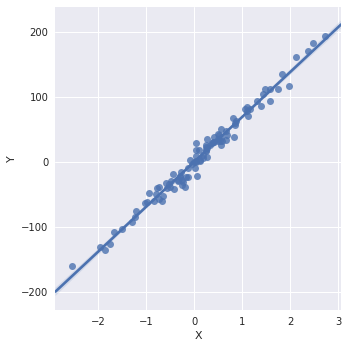

In [33]:
from sklearn.datasets import make_regression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

x_train, y_train, W_target = make_regression(n_samples=100, n_features=1, noise=10, coef = True)

df = pd.DataFrame(data = {'X':x_train.ravel(), 'Y':y_train.ravel()})

sns.lmplot(x='X', y='Y', data=df, fit_reg=True)
plt.show()

x_torch = torch.FloatTensor(x_train)
y_torch = torch.FloatTensor(y_train)
y_torch = y_torch.view(y_torch.size()[0], 1)

PyTorch has a lot of useful modules in its **nn** library. One of them is linear. As the name suggests, it performs a linear transformation of its input, which is essentially linear regression does. 

In [34]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)  
        
    def forward(self, x):
        return self.linear(x)

model = LinearRegression(1, 1)

To train a linear regression, we will need to add the right loss function from the same **nn** library. For linear regression we will use **MSELoss()**, mean squared error loss function.

We will also need to use optimization function (SGD), and run a backpropagation similar to our previous toy example. Essentially, we repeating the steps from the **train()** function we defined above. The reason we can't use this function directly is that we implemented it for classification, not for regression, and as model prediction we use the index of the maximum element of cross-entropy loss. For linear regression we use output of linear layer as a prediction.

In [35]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  


for epoch in range(50):
    data, target = Variable(x_torch), Variable(y_torch)
    output = model(data)
        
    optimizer.zero_grad()
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
        
predicted = model(Variable(x_torch)).data.numpy()

We can now print the original data and linear regression that we fit with PyTorch.

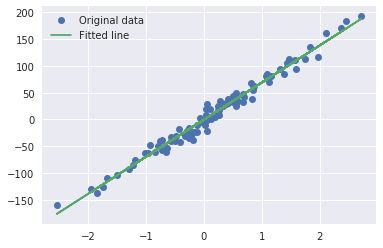

In [36]:
plt.plot(x_train, y_train, 'o', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

To move forward with more complex models, let's download MNIST dataset to your 'datasets' folder and test some initial pre-processing that's available in PyTorch. PyTorch has dataloaders and handlers for various datasets. Once downloaded, you can use them any time. You can also wrap your data in PyTorch tensors and create your own data loader class.

Batch size is a term used in machine learning and refers to the number of training examples utilised in one iteration. The batch size can be one of three options:
-  batch mode: where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent
-  mini-batch mode: where the batch size is greater than one but less than the total dataset size. Usually, a number that can be divided into the total dataset size.
-  stochastic mode: where the batch size is equal to one. Therefore the gradient and the neural network parameters are updated after each sample.


In [37]:
from torchvision import datasets, transforms

batch_num_size = 64

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data',train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), 
    batch_size=batch_num_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data',train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), 
    batch_size=batch_num_size, shuffle=True)

## 2.1 Logistic regression with MNIST

Let's visualize some of the downloaded MNIST data to better understand what kind of data we are trying to classify.

In [38]:
sns.reset_orig()

dataiter = iter(train_loader)
(data,target) = dataiter.next()

data = data.numpy()
print (data.shape)
#print (data[:, 0].shape)  
fig, axes = plt.subplots(ncols=10, figsize=(20, 4))

(64, 1, 28, 28)


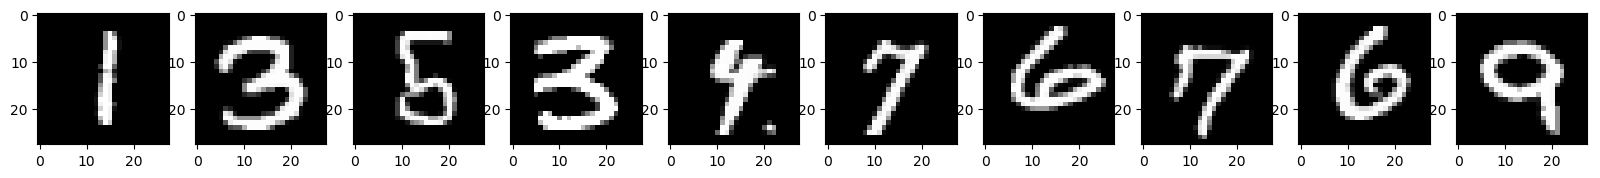

In [39]:
for col in range(10):
    axes[col].imshow(data[col, 0, :, :], cmap=plt.cm.gray)
plt.show()

Now we are ready to write a logistic regression model. It's really easy in pytorch. In fact, it's exactly like linear regression, we just need to change the loss function to cross entropy loss during training and inference. We also added input reshaping for the case of multy-dimensional input tensor.

In [40]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, x):
        x = x.view(x.size()[0], -1)
        return self.linear(x)

Since logistic regression is a classification model, we can use **train()** and **test()** function we defined earlier. Hence training and testing the model is as easy as one line of code.

We can add some regularization during training. To add a common **L2** regularizer, just add **weight_decay** parameter to **SGD()** function.

In [41]:
model = LogisticRegression(28*28, 10)
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=0.01)  

# Training the Model
for epoch in range(3):
    train(model, epoch, criterion, optimizer, train_loader)
    acc, loss = test(model, epoch, criterion, test_loader)

Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.248953
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.201164

Test set: Average loss: 0.3464, Accuracy: 8986/10000 (90%)

Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.253158
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.292870

Test set: Average loss: 0.3298, Accuracy: 9059/10000 (91%)

Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.321621
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.324983

Test set: Average loss: 0.3236, Accuracy: 9049/10000 (90%)



After you trained your logistic regression function, you can interface weights of your model with NumPy and print the features your model learned.

In [42]:
fig, axes = plt.subplots(ncols=10, figsize=(20, 4))

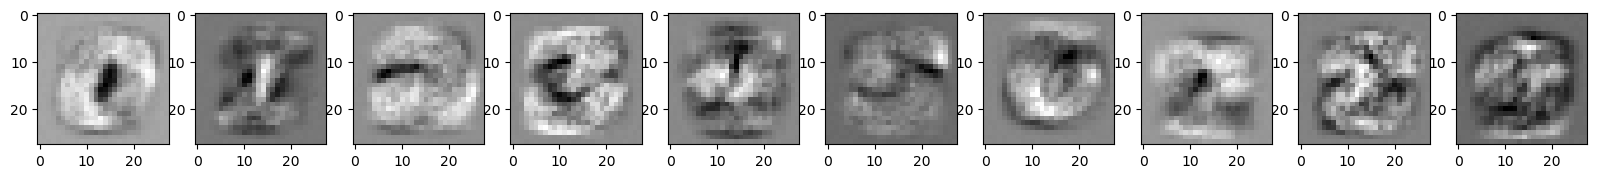

In [43]:
data = model.linear.weight.data.cpu().view(10, 1, 28, 28).numpy()
for col in range(10):
    axes[col].imshow(data[col, 0, :, :], cmap=plt.cm.gray)
plt.show()

If you want to save the model to avoid costly retraining process, you can use **torch.save()** function. You can find more information on how to store models in the corresponding page of the [pytorch documentation](http://pytorch.org/docs/master/torch.html#serialization).  

In [44]:
torch.save(model.state_dict(), 'pretrained/logreg.t7')

##  3. LeNet Convolutional Neural Network (CNN) in PyTorch

Let's create our first simple neural network from scratch. This network is going to perform image classification trying to recognize hand-written numbers from MNIST dataset. It's a four layer convolutional neural network (CNN), a very common architecture for analyzing MNIST datasets. This code is adopted from one of the official PyTorch tutorials, but you can find many more examples of what you can do with PyTorch as a deep net researcher [here](http://pytorch.org/tutorials/).

We will use several modeules from **torch.nn** library. 
1. **Linear** layer -- applies linear transformation of the input tensor using the layer's weights.
2. **Conv1** and **Conv2** -- convolution layers, each will output a dot product between convolution kernel (weights tensor of small size) and a small input region of the same size.
3. **Relu** -- rectified linear unit function, applies an elementwise activation function **max(0,x)**. 
4. **Pooling** layer -- performs downsampling of certain area (typically 2x2 pixels) using the **max** operation.
5. **Dropout2D** -- randomly zeroes whole channels of the input tensor. In the case where feature maps are strongly correlated, dropout2D promotes the independence between feature maps.
6. **Softmax** -- applies the **Log(Softmax(x))** function to an n-dimensional input Tensor to get the output between 0 and 1.

In [45]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        
    def forward(self,x):
        x = F.relu(F.max_pool2d(self.conv1(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

After creating a LeNet class, let's create an object and move it to gpu

In [46]:
model = LeNet()
if cuda_gpu:
    model.cuda()
    
print ('MNIST_net model:\n')
print (model)

MNIST_net model:

LeNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


To train this model we're going to use SGD with learning rate=0.01 and momentum=0.5 
Check this link for SGD and [mometum](http://ruder.io/optimizing-gradient-descent/index.html#momentum) explanation.

In [47]:
criterion = nn.CrossEntropyLoss()  
optimizer = optim.SGD(model.parameters(),lr = 0.005, momentum = 0.9)

We can train a pretty accurate LeNet model just after 5 epochs (one epoch means you use the whole training dataset for updating the training model weights one time). This code checks to see if you have a pre-trained model already stored in a file. If so, it just loads it. Otherwise, it trains one and saves it to disk.

In [48]:
import os 

epochs = 5
if (os.path.isfile('pretrained/MNIST_net.t7')):
    print ('Loading model')
    model.load_state_dict(torch.load('pretrained/MNIST_net.t7', map_location=lambda storage, loc: storage))
    acc, loss = test(model, 1, criterion, test_loader)
else:
    print ('Training model')
    for epoch in range(1, epochs + 1):
        train(model, epoch, criterion, optimizer, train_loader)
        acc, loss = test(model, 1, criterion, test_loader)
    torch.save(model.state_dict(), 'pretrained/MNIST_net.t7')


Loading model

Test set: Average loss: 0.0471, Accuracy: 9859/10000 (99%)



Now let's look at our model. First let's print out the information about it. The print functions show all the layers (E.g., Dropout is implemented as a separate layer), their name and parameters. It also prints the names for all the layers which will be used in the next steps.

In [49]:
print ('MNIST_net model:\n')
print (model)

MNIST_net model:

LeNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)




There is also an iterator that runs over all the named modules in the model. This is helpful when you have a complex DNN that consists of multiple "internal" models. Iterating over all named modules allows us to create model parsers that can read model parameters and create modules similar to ones that are used in the network.


In [50]:
print ('Internal models:')
for idx, m in enumerate(model.named_modules()):
    print(idx, '->', m)
    print ('-------------------------------------------------------------------------')

Internal models:
0 -> ('', LeNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
))
-------------------------------------------------------------------------
1 -> ('conv1', Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1)))
-------------------------------------------------------------------------
2 -> ('conv2', Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1)))
-------------------------------------------------------------------------
3 -> ('conv2_drop', Dropout2d(p=0.5))
-------------------------------------------------------------------------
4 -> ('fc1', Linear(in_features=320, out_features=50, bias=True))
-------------------------------------------------------------------------
5 -> ('fc2', Linear(in_features=50, out_features=10, bias=True))
------------------

Similar to named modules, we can iterate over a model's internal parameters. This code prints out information about all the data containers that a specific model uses. It's helpful to know how to access these parameters for updating weight tensors.

In [51]:
print('internal parameters:')
for name,param in model.named_parameters():
    print(name + ": ", type(param), param.size())
    print('---------------------------------------------------------------------------------------')

internal parameters:
conv1.weight:  <class 'torch.nn.parameter.Parameter'> torch.Size([10, 1, 5, 5])
---------------------------------------------------------------------------------------
conv1.bias:  <class 'torch.nn.parameter.Parameter'> torch.Size([10])
---------------------------------------------------------------------------------------
conv2.weight:  <class 'torch.nn.parameter.Parameter'> torch.Size([20, 10, 5, 5])
---------------------------------------------------------------------------------------
conv2.bias:  <class 'torch.nn.parameter.Parameter'> torch.Size([20])
---------------------------------------------------------------------------------------
fc1.weight:  <class 'torch.nn.parameter.Parameter'> torch.Size([50, 320])
---------------------------------------------------------------------------------------
fc1.bias:  <class 'torch.nn.parameter.Parameter'> torch.Size([50])
---------------------------------------------------------------------------------------
fc2.weight:

Let's try to access a weight tensor and print it out. We can see the tensor type and size along with data. Also, we can just print the tensor size. Weight tensors in DNNs are usually very large, so checking the size (as opposed to the contents) is very useful when debugging.

In [52]:
t = model.conv1.weight
print (type(t))
print (t.size())
print (t)

<class 'torch.nn.parameter.Parameter'>
torch.Size([10, 1, 5, 5])
Parameter containing:
(0 ,0 ,.,.) = 
 -0.3326  0.0619  0.1446  0.0613  0.0869
 -0.4763 -0.0131  0.1291  0.3374  0.2129
 -0.1188  0.1643  0.2340  0.1542 -0.0067
  0.0897  0.2317 -0.0397 -0.1650 -0.1677
  0.0560 -0.1716 -0.1474  0.0969 -0.1119

(1 ,0 ,.,.) = 
  0.1474  0.3115  0.4264  0.2165 -0.0203
 -0.1965 -0.1293 -0.2629 -0.0161 -0.0762
 -0.2161 -0.4547 -0.4099 -0.2752 -0.0581
 -0.0212 -0.0789 -0.0444  0.0544  0.0801
  0.2962  0.2762  0.3134  0.1210  0.0436

(2 ,0 ,.,.) = 
 -0.0276  0.1624 -0.0489  0.3204  0.1842
 -0.1948  0.0329  0.0998  0.0817  0.4210
  0.1177 -0.0811 -0.0034 -0.0733  0.1315
 -0.0694 -0.1168 -0.1301 -0.0334  0.2707
 -0.3927 -0.1096 -0.1386 -0.2398  0.0943

(3 ,0 ,.,.) = 
  0.1664  0.1382 -0.1063 -0.1228 -0.3840
 -0.0894 -0.1955 -0.2881 -0.3713 -0.0840
  0.0021 -0.2913 -0.2737 -0.0415  0.2981
 -0.3226 -0.2793  0.0191  0.1750  0.0479
 -0.3260  0.0261 -0.0394  0.1033  0.1065

(4 ,0 ,.,.) = 
  0.0569  0.33

Here the object printed is a Variable and not a tensor. It is a wrapper around the tensor used to build the computation graph for the forward/backward path. To access the actual tensor, we need to use .data.

In [53]:
t = model.conv2.weight 
print(type(t.data))
print(t.data.size())
print(t.data)

<class 'torch.cuda.FloatTensor'>
torch.Size([20, 10, 5, 5])

(0 ,0 ,.,.) = 
 -8.2037e-05  1.3582e-02  2.0244e-02 -1.9943e-02 -7.7893e-02
 -1.0396e-01 -8.3978e-02 -1.2411e-01 -1.2931e-01 -4.0826e-02
 -1.2326e-01 -9.8568e-02 -5.3306e-02  1.0149e-01  1.2639e-01
 -8.6661e-02 -6.2155e-02 -6.5777e-02 -5.7857e-02 -6.2671e-02
 -6.5787e-02 -1.8636e-01 -1.6291e-01 -1.7345e-01 -1.2998e-01

(0 ,1 ,.,.) = 
 -5.8389e-02 -2.2088e-02 -6.8403e-02  2.6269e-02  5.0578e-02
  2.9074e-02  7.5517e-02  1.2157e-01  1.3417e-01  7.3019e-02
  3.9684e-02 -7.8071e-02 -3.4606e-02 -2.5784e-02  1.5061e-02
  4.4148e-02 -2.4495e-02 -3.2028e-02  7.8683e-02  6.5671e-02
 -1.0896e-04  5.9706e-02  1.8927e-02  3.1335e-02 -3.6424e-02

(0 ,2 ,.,.) = 
 -4.5042e-02 -1.5815e-02 -1.0917e-02 -4.0813e-02  2.7118e-03
  3.1682e-02  4.8692e-02 -4.9076e-02 -7.4701e-02 -6.0333e-02
 -4.1446e-02 -1.2763e-01 -8.7152e-02  1.8507e-02  6.4115e-02
 -5.9946e-02 -3.4380e-02  7.6220e-02  9.3114e-03  4.0778e-02
  6.4881e-02 -1.5272e-02  8.1760e-02  



You always can move tensor to the CPU (or make sure it's there) using the .cpu() method. Alternatively, you can always move a tensor to the GPU, if a GPU is available (torch.cuda.is_available()) using .cuda() method. You can see that if the tensor is on GPU, its type is 'torch.cuda.FloatTensor'. If tensor is on the CPU, its type is just 'torch.FloatTensor'.


In [54]:
print (type(t.cpu().data))
if torch.cuda.is_available():
    print ("Cuda is available")
    print (type(t.cuda().data))
else:
    print ("Cuda is NOT available")

<class 'torch.FloatTensor'>
Cuda is available
<class 'torch.cuda.FloatTensor'>


If the tensor is on the CPU, we can transform it to numpy array sharing the same memory location and changing the one will change the other. 

In [55]:
if torch.cuda.is_available():
    try:
        print(t.data.numpy())
    except RuntimeError as e:
        "you can't transform a GPU tensor to a numpy nd array, you have to copy your weight tendor to cpu and then get the numpy array"

print(type(t.cpu().data.numpy()))
print(t.cpu().data.numpy().shape)
print(t.cpu().data.numpy())

<class 'numpy.ndarray'>
(20, 10, 5, 5)
[[[[ -8.20374626e-05   1.35821616e-02   2.02440582e-02  -1.99429858e-02
     -7.78933167e-02]
   [ -1.03958428e-01  -8.39783996e-02  -1.24106504e-01  -1.29314303e-01
     -4.08263505e-02]
   [ -1.23256370e-01  -9.85683054e-02  -5.33063151e-02   1.01492234e-01
      1.26388997e-01]
   [ -8.66612867e-02  -6.21546768e-02  -6.57773316e-02  -5.78570701e-02
     -6.26707450e-02]
   [ -6.57874942e-02  -1.86357662e-01  -1.62909701e-01  -1.73445672e-01
     -1.29978418e-01]]

  [[ -5.83886914e-02  -2.20877603e-02  -6.84031472e-02   2.62686014e-02
      5.05783781e-02]
   [  2.90736072e-02   7.55167156e-02   1.21565565e-01   1.34170964e-01
      7.30192587e-02]
   [  3.96843553e-02  -7.80714527e-02  -3.46058942e-02  -2.57841907e-02
      1.50611680e-02]
   [  4.41484600e-02  -2.44949162e-02  -3.20279710e-02   7.86829293e-02
      6.56709597e-02]
   [ -1.08956403e-04   5.97056448e-02   1.89267155e-02   3.13353091e-02
     -3.64244208e-02]]

  [[ -4.50419225e



Now that we know how to convert tensors to numpy arrays, we can use this knowledge to vizualise them with matplotlib! Let's print out the conv filters of the first convolutional layer.


(10, 1, 5, 5)
(10, 5, 5)


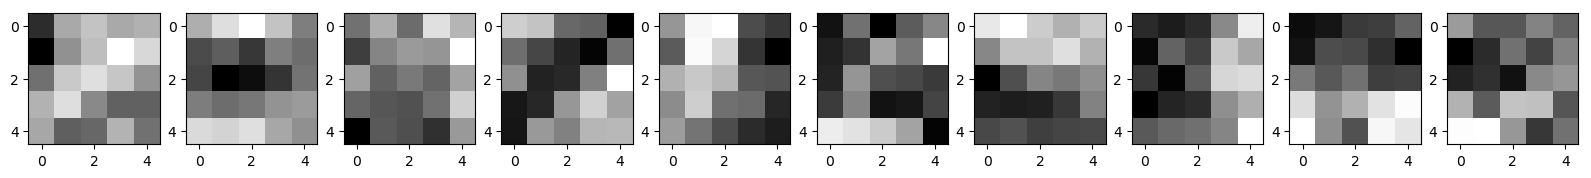

In [56]:
data = model.conv1.weight.cpu().data.numpy()
print (data.shape)
print (data[:, 0].shape)

kernel_num = data.shape[0]

fig, axes = plt.subplots(ncols=kernel_num, figsize=(2*kernel_num, 2))

for col in range(kernel_num):
    axes[col].imshow(data[col, 0, :, :], cmap=plt.cm.gray)
plt.show()



These plots have a large amount of contrast, but that is because they are normalized by the maximum/minimum weight in each filter, not across all the filters. After normalization, the plots look like the figures below.


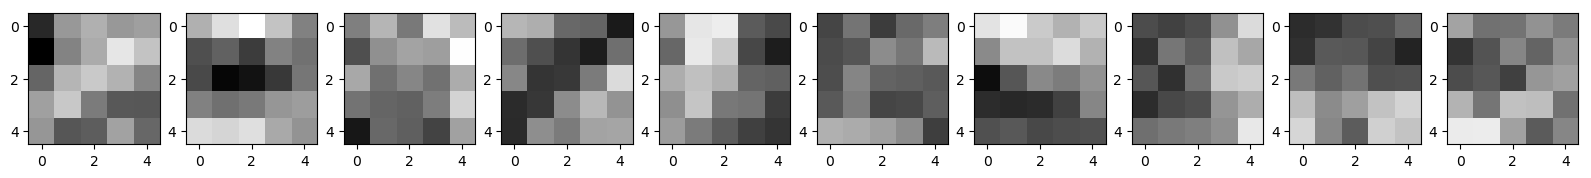

In [57]:
fig, axes = plt.subplots(ncols=kernel_num, figsize=(2*kernel_num, 2))

for col in range(kernel_num):
    axes[col].imshow(data[col, 0, :, :], vmin=np.amin(data), vmax=np.amax(data), cmap=plt.cm.gray)
plt.show()



If you want also zero-center the plots, you need to add this condition to the plot properties. After zero-centering, the plots look almost identical, which tells us that the weights are relatively balanced with respect to zero.


Minimal weight -0.476305
Maximal weight 0.426415
Absolute maximal weight 0.476305


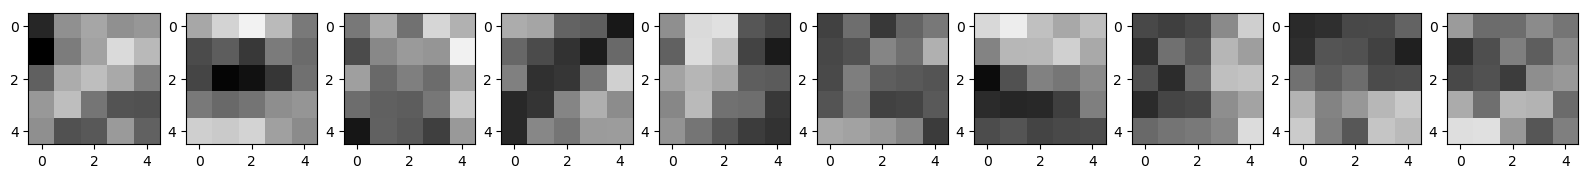

In [58]:
fig, axes = plt.subplots(ncols=kernel_num, figsize=(2*kernel_num, 2))

abs_max = np.max(np.fabs(data))
print ('Minimal weight', np.amin(data))
print ('Maximal weight', np.amax(data))
print ('Absolute maximal weight', abs_max)
for col in range(kernel_num):
    axes[col].imshow(data[col, 0, :, :], vmin=-abs_max, vmax=abs_max, cmap=plt.cm.gray)
plt.show()

## 4. Application on surface finish quality inspection

* Surface finish is important to improve appearance as well as quality (rough surfaces wear more quickly).
* The surface roughness is a good predictor of the mechanical interactions and can be due to a non-optimal manufacturing process.
* Roughness is mostly measured using a manual comparison against a surface roughness gage, it's also possible to use a profilometer.
* **Goal:** Automate surface finish quality inspection on aluminum pieces manufactured at Georgia Tech.
* Replicate human judgement of good/bad surface finish => Image classification => CNN

In the goal of moving towards smart manufacturing and fully automated machine shops, we looked into finding a way to automate surface finish quality inspection. We are trying to replicate human judgement without using surface roughness gage. The generated pieces are in aluminum produced from turning operations from a CNC machine. 
If a human can look at the surface and decide whether the surface is good or bad, can an algorithm do so based on a picture, mainly that now, most of us have good quality cameras on our devices ? 
This problem goes back to a binary image classification task. 
The rest of the tutorial will show you how we retrained a CNN to classify our images and reached --- % accuracy. 

In [59]:
from torch.optim import lr_scheduler
from skimage import io, transform
import torchvision
from torchvision import models
from torch.utils.data import Dataset, DataLoader

plt.ion()   # interactive mode

We load our dataset that you can find publically available at .... . Our dataset has 570 pictures per class, divided as follows: 490 per class for training and 80 per class for validation. It is recommended to keep 10 to 30 % of the data as validation data in order to tune the model. Remember that in Machine Learning/Deep learning, the testing dataset is precious, so it should be different from the validation and the training. We used 70 pictures per class for Testing.  
We do some pre-processsing on the images: Resize them to 256, then crop at center to get an image of size 224.  

In [60]:
# Data augmentation and normalization for training
# Just normalization for validation and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/surface_quality'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_num_size,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val','test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val','test']}
class_names = image_datasets['train'].classes

## 4.1 Dataset:
* Training: 490 per class
* Validation: 80 per class
* Testing: 70 per class 

Let's write a function to visualize the images that we using from our dataet. 

In [61]:
def imshow(batch, class_names=None, num_images=4):
    plt.figure(figsize=(1.7*num_images, 1.7))
    img, classes = batch
    img_num = min(num_images, img.shape[0])

    grid = torchvision.utils.make_grid(img[:img_num], nrow=img_num, padding=10, pad_value=10)
    grid = grid.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    grid = std * grid + mean
    grid = np.clip(grid, 0, 1)
    plt.imshow(grid)
    if class_names:
        titles = [class_names[x] for x in classes[:img_num]]
        plt.title(titles)
    plt.pause(0.001)  # pause a bit so that plots are updated

Now let's visualize 4 random images from the dataset.

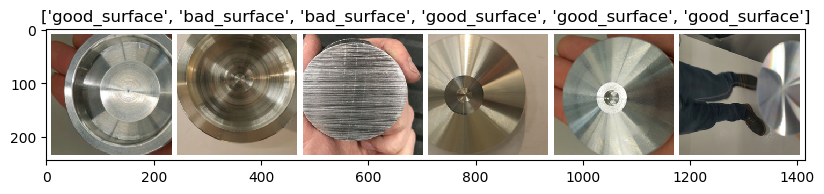

In [62]:
imshow(next(iter(dataloaders['train'])), class_names, num_images=6)

Let's now write our training function: 

In [63]:
def train_model(model, criterion, optimizer, scheduler, train_loader, test_loader, num_epochs=25):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 80)

        scheduler.step()
        train(model, epoch, criterion, optimizer, train_loader)
        acc, loss = test(model, epoch, criterion, test_loader)
        if acc > best_acc:
            best_acc = acc
            best_model_wts = model.state_dict()

    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [64]:
def visualize_model(model, dataset, class_names=None, num_images=6):
    inputs, target = next(iter(dataset))
    inputs, target = Variable(inputs), Variable(target)
    if cuda_gpu:
        inputs, labels = inputs.cuda(), target.cuda()
        model.cuda()
    outputs = model(inputs)
    _, preds = torch.max(outputs.data, 1)
    imshow((inputs.data, preds), class_names=class_names, num_images=num_images)
    if class_names:
        print ('Actual labels:\n',[class_names[x] for x in target.data[:num_images]])
        

## Transfer Learning

Training a deep network from scratch is tricky because of limited dataset and computationally expensive.

**Transfer Learning** is a method of using a deep net pretrained on a larger dataset as feature extractor. We  need to change classification layers according to our dataset and retrain the network. For re-training we have two options: 
* Finetuning -- retrain all the layers.
* **Fixed feature extractor** -- only retrain classifier (usually, last fully connected layers of the network).

We used **ResNet18** which was trained on ImageNet, we set pretrained=True


In [65]:
model_ft = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

Let's set our training parameters and fine-tune the last layer of the function.
* Optimization Method: SGD
* Loss function: CrossEntropyLoss

In [66]:
cuda_gpu = torch.cuda.is_available()
#cuda_gpu = False
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [67]:
%time model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, \
                             dataloaders['train'], dataloaders['val'], num_epochs=25)
# Save the trained model
torch.save(model_ft, 'pretrained/resnet18_surface.t7')

Epoch 0/24
--------------------------------------------------------------------------------

Test set: Average loss: 0.2126, Accuracy: 153/160 (96%)

Epoch 1/24
--------------------------------------------------------------------------------

Test set: Average loss: 0.1146, Accuracy: 155/160 (97%)

Epoch 2/24
--------------------------------------------------------------------------------

Test set: Average loss: 0.1029, Accuracy: 156/160 (98%)

Epoch 3/24
--------------------------------------------------------------------------------

Test set: Average loss: 0.0888, Accuracy: 155/160 (97%)

Epoch 4/24
--------------------------------------------------------------------------------

Test set: Average loss: 0.0620, Accuracy: 156/160 (98%)

Epoch 5/24
--------------------------------------------------------------------------------

Test set: Average loss: 0.0703, Accuracy: 157/160 (98%)

Epoch 6/24
--------------------------------------------------------------------------------

Test se

# Training Results: 

* Training on CPU took 1h 21min 55s with a test accuracy = 97.14 %
* Training on GPU took 1min 47s with a test accuracy = 97.86 %

In [68]:
acc, loss = test(model_ft, 0, criterion, dataloaders['test'])


Test set: Average loss: 0.1052, Accuracy: 136/140 (97%)



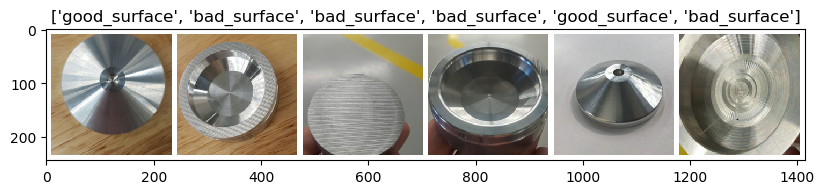

Actual labels:
 ['good_surface', 'bad_surface', 'bad_surface', 'bad_surface', 'good_surface', 'bad_surface']


In [69]:
visualize_model(model_ft, dataloaders['test'], num_images=6, class_names=class_names)

In [70]:
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (b

# Future work

1. Adding more variety to dataset
2. Adding more classes for surface quality
3. Propagating class labels back to pixels to aid visual quality inspection
4. Write an Android application to run surface quality inspection on the phone directly in the machine shop 

**Related Python-friendly deep learning frameworks.**
* PyTorch
* Caffe2
* Keras
* Tensorflow
* MXNet

**Acknowledgements.** We'd like to thank [Facebook Research's Caffe2 team](https://caffe2.ai/) for their generous support of some of our research, which motivated us to learn PyTorch and develop this tutorial.

# Thank You !